In [15]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
# Number of students
n = 100

# Generate dataset
data = {
    "student_id": range(1, n+1),
    "name": [f"Student_{i}" for i in range(1, n+1)],
    "class": np.random.choice(["A", "B", "C"], size=n),
    "comprehension": np.random.randint(50, 100, n),
    "attention": np.random.randint(40, 100, n),
    "focus": np.random.randint(45, 100, n),
    "retention": np.random.randint(50, 100, n),
    "engagement_time": np.random.randint(30, 180, n),  # minutes
}

# Make assessment_score depend somewhat on other skills
data["assessment_score"] = (
    0.3*pd.Series(data["comprehension"]) +
    0.2*pd.Series(data["attention"]) +
    0.2*pd.Series(data["focus"]) +
    0.2*pd.Series(data["retention"]) +
    0.1*(pd.Series(data["engagement_time"])/2)
).astype(int)

df = pd.DataFrame(data)
df.head()


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,1,Student_1,C,65,68,75,78,81,67
1,2,Student_2,C,81,48,60,97,50,67
2,3,Student_3,A,51,58,78,67,101,60
3,4,Student_4,B,93,79,62,60,176,76
4,5,Student_5,B,73,56,86,56,51,64


In [17]:
import seaborn as sns

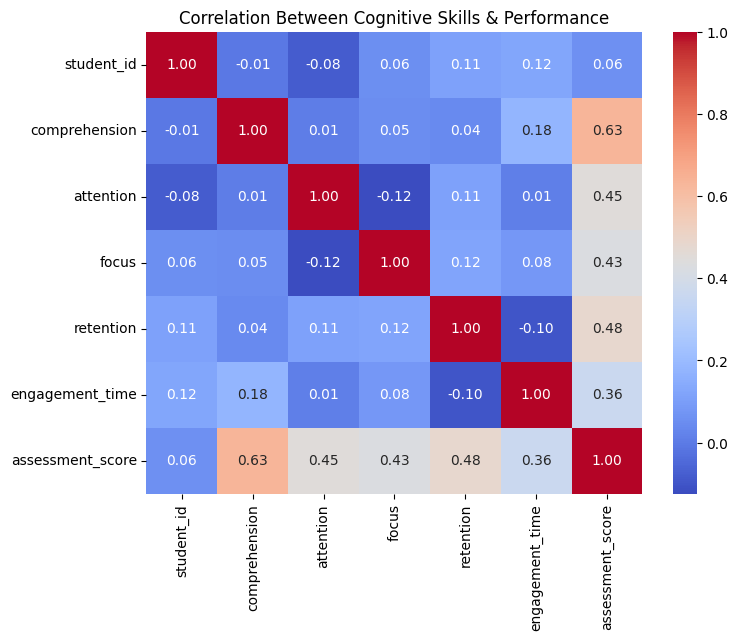

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cognitive Skills & Performance")
plt.show()


In [19]:
X = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]
y = df["assessment_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print("Model Accuracy (R^2):", score)

# Predict for test set
y_pred = model.predict(X_test)


Model Accuracy (R^2): 0.9953882169523315


In [20]:
# Use skills for clustering
features = df[["comprehension", "attention", "focus", "retention", "engagement_time"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["persona"] = kmeans.fit_predict(features)

df[["student_id", "name", "persona"]].head(10)

,student_id,name,persona
0,1,Student_1,0
1,2,Student_2,0
2,3,Student_3,1
3,4,Student_4,2
4,5,Student_5,0
5,6,Student_6,2
6,7,Student_7,1
7,8,Student_8,2
8,9,Student_9,0
9,10,Student_10,0


In [21]:
# Save as CSV
df.to_csv("students_with_personas.csv", index=False)

# Save as JSON
df.to_json("students_with_personas.json", orient="records")